Take each 50x50 pixel training image and vectorize into a 2500-dimensional vector. Then perform
principal component analysis (PCA) on the entire set of training image vectors, retaining the first
d principal components. Remember to normalize your training vectors. The d eigenvectors (when
reshaped and displayed as images) are the Eigenfaces. Display the top d = 9 eigenvectors (eigenfaces)
after training.

In [1]:
from readFaceImages import readFaceImages

In [2]:
im1, pp1, indiv, lighting = readFaceImages("./faces/")
vector_array = []
training_vectors = []

In [3]:
import numpy as np

In [4]:
# (1) refer for 1.2
for a in im1:
  a = a.flatten()
  vector_array.append(a)

In [5]:
print(im1)

[[[255 105  56 ...   0   3   3]
  [129  75  22 ...   0   0   0]
  [ 61  40  24 ...   0   0   0]
  ...
  [  0   0 121 ...  10   8   9]
  [  0   0 140 ...   7   9   7]
  [  0   0 128 ...   8   9   7]]

 [[141 153 139 ...  76  60  67]
  [134 124 115 ...  78  67  62]
  [110 106 118 ...  74  71  58]
  ...
  [ 98 112 130 ...  71  71  54]
  [ 87  92 126 ...  64  62  40]
  [ 85  96  96 ...  61  47  47]]

 [[ 98  89  92 ... 101 106 110]
  [ 73  77  87 ... 101 115 108]
  [ 58  64  77 ...  86  96 110]
  ...
  [ 60  74  77 ... 104  84  88]
  [ 44  66  63 ...  89  83  82]
  [ 43  49  58 ...  85  88  71]]

 ...

 [[ 46  35  24 ...   4   7   7]
  [ 31  32  32 ...   4   5   7]
  [ 45  56  36 ...   4   8   6]
  ...
  [235 225 189 ...  13  13  12]
  [193 213 199 ...  10  12  12]
  [184 206 197 ...  10   9  10]]

 [[  2   0   0 ...  11  28  43]
  [  0   0   0 ...   6  28  21]
  [  0   0   0 ...   8  13  32]
  ...
  [  0   2   3 ...  97 109 120]
  [  0   4   4 ...  83 106 118]
  [  0   2   3 ...  85 107 1

In [6]:
print(vector_array)

[array([255, 105,  56, ...,   8,   9,   7], dtype=uint8), array([141, 153, 139, ...,  61,  47,  47], dtype=uint8), array([98, 89, 92, ..., 85, 88, 71], dtype=uint8), array([19, 24, 31, ..., 79, 82, 79], dtype=uint8), array([ 8,  8,  9, ..., 79, 83, 71], dtype=uint8), array([186, 198, 203, ...,  20,  20,  20], dtype=uint8), array([ 91,  98, 101, ...,  13,  13,  13], dtype=uint8), array([111,  99, 104, ...,   9,   6,   8], dtype=uint8), array([ 82,  93, 109, ...,  88,  88,  71], dtype=uint8), array([82, 95, 99, ..., 93, 83, 91], dtype=uint8), array([35, 29, 41, ..., 85, 70, 57], dtype=uint8), array([133,  86,  29, ...,  13,  11,  12], dtype=uint8), array([22, 23, 20, ...,  8, 10, 10], dtype=uint8), array([33, 29, 12, ..., 11, 13,  0], dtype=uint8), array([58, 62, 53, ..., 13, 16, 15], dtype=uint8), array([ 1,  1,  2, ..., 13, 14, 16], dtype=uint8), array([52, 62, 50, ..., 11, 11, 12], dtype=uint8), array([ 1,  3,  4, ..., 78, 86, 82], dtype=uint8), array([  1,   3,   1, ...,  95, 118,  2

In [7]:
#(2) refer for 1.2
mean_normalize = np.mean(vector_array)
print(mean_normalize)

71.386653125


In [8]:
#(3) refer for 1.2
vector_array = vector_array - mean_normalize
print(vector_array)

[[183.61334687  33.61334688 -15.38665312 ... -63.38665312 -62.38665312
  -64.38665312]
 [ 69.61334688  81.61334688  67.61334688 ... -10.38665312 -24.38665312
  -24.38665312]
 [ 26.61334688  17.61334688  20.61334688 ...  13.61334688  16.61334688
   -0.38665312]
 ...
 [-25.38665312 -36.38665312 -47.38665312 ... -61.38665312 -62.38665312
  -61.38665312]
 [-69.38665312 -71.38665312 -71.38665312 ...  13.61334688  35.61334688
   46.61334688]
 [-68.38665312 -70.38665312 -71.38665312 ...  89.61334688  90.61334688
   48.61334688]]


In [9]:
#(4) refer for 1.2
from numpy import linalg as la
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
u, s, vh = la.svd(vector_array)

#need to reshape for 2500-D vector
for x in range(9):
  #got this from our classroom Slack
  training_vectors.append(np.reshape(vh[x], (50, 50))) 

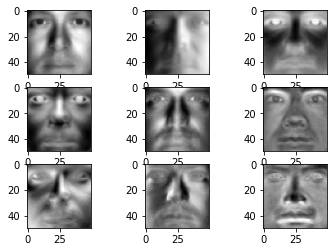

In [10]:
import matplotlib.pyplot as plt
plot = plt.figure()
for i in range(9):
  plot.add_subplot(3,3, i+1)
  plt.imshow(training_vectors[i],cmap = 'gray')

For d = 9, on each subset, perform PCA and display one (your random pick) original and the
corresponding reconstructed face, i.e., you will display 2x5 = 10 faces.

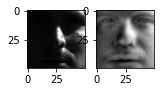

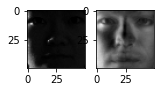

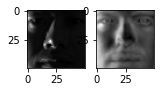

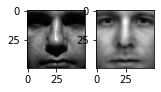

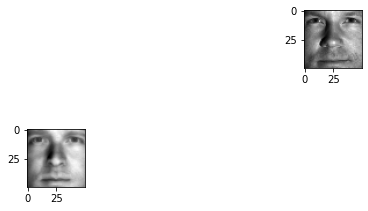

In [11]:
#5 subsets x (1-7)or(8-19)or(20-31)or(32-45)or(46-64)

#random pick of choice
random = [3, 12, 15, 21, 36]
num_img = len(im1)
num_ppl = len(indiv)

#exact same thing as part 1.1
for i in range(5):
  #establish the vectors (refer to 1)
  vector_array = []
  training_vectors = []
    
  #flatten and add to vector_array(refer to 2)
  for j in range(num_img):
    a = im1[j].flatten()
    vector_array.append(a)

  #find mean and subtract (refer to 3)
  mean_normalize = np.mean(vector_array)
  vector_array = vector_array - mean_normalize

  #(refer to 4)
  # https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
  u, s, vh = la.svd(vector_array)
  for k in range(9):
    training_vectors.append(vh[k])
    
    
    
#RECONSTRCTION
  for m in range(9):
    location = random[i]+1
    location = im1[location]
    loc_flat = location.flatten()
    
    vector_loc = training_vectors[m]
    dot_product = np.dot(loc_flat, vector_loc)
    
    add_mean = vector_loc*dot_product
    
    mean_normalize = mean_normalize + add_mean
    
#PLOT
  plot = plt.figure()

  #for the original pictures
  plot.add_subplot(2, 5, i+1)
  plt.imshow(im1[random[i]+1].reshape(50,50), cmap='gray')

  #for the reconstructed pictures
  plot.add_subplot(2, 5, i+2)
  plt.imshow(mean_normalize.reshape(50,50), cmap='gray')


Train your Eigenface algorithm with d = 9 and d = 30 on all images in subset 1 (70 images). 

For each of your training images, project it to the d-dimensional Eigenspace. Classification will then be performed by nearest neighbor with the L2 (Euclidean distance) metric in the Eigenspace. 

Then, evaluate your algorithm on subsets 1-5, and report the error rates in a table (i.e., number of misclassified images over the total number of image, for each subset). 

For subset 1, you would expect perfect recognition because it is used for training.

In [12]:
#copy logic from 1.1 again

subset1 = []
scores = {}

for i in range(num_img):
  l_or_d = lighting[i]
  ind = indiv[i]
  if l_or_d == 1 and ind == 1:
        subset1.append(im1[i].flatten())
         
#find mean and subtract (refer to 3)
mean_normalize = np.mean(subset1)
subset1 = subset1 - mean_normalize

#(refer to 4)
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
u, s, vh = la.svd(subset1)


In [13]:
#create separate vectors for d = 9 and d = 30

vector_9 = []
vector_30 = []
vnum_9 = len(vector_9)
vnum_30 = len(vector_30)

for j in range(9):
  vector_9.append(vh[j])


for j in range(30):
  vector_30.append(vh[j])


####for debugging
print("VECTOR WHEN D = 9")
print(vector_9)
print("VECTOR WHEN D = 30")
print(vector_30)


VECTOR WHEN D = 9
[array([0.03445699, 0.03581258, 0.03550659, ..., 0.02114287, 0.02747931,
       0.03106198]), array([0.0211026 , 0.02178205, 0.02244035, ..., 0.01736865, 0.01797042,
       0.0205761 ]), array([-0.03362932, -0.02784536, -0.03441117, ..., -0.00462641,
       -0.0090664 , -0.00379857]), array([ 0.00769906, -0.02458113, -0.00622959, ...,  0.04705241,
        0.05655198,  0.05060716]), array([ 0.01970684, -0.00084919, -0.00608107, ..., -0.0179632 ,
       -0.01954922, -0.01408271]), array([0.00585515, 0.01006455, 0.02313529, ..., 0.04078515, 0.04728148,
       0.05044585]), array([-0.04797885, -0.03393854, -0.05174863, ..., -0.01673325,
       -0.02640008, -0.03541149]), array([ 0.03156516, -0.00847758, -0.02839761, ...,  0.00149957,
       -0.00775909, -0.00535438]), array([ 0.031738  ,  0.05025645,  0.03394799, ..., -0.010251  ,
       -0.01975436, -0.02620082])]
VECTOR WHEN D = 30
[array([0.03445699, 0.03581258, 0.03550659, ..., 0.02114287, 0.02747931,
       0.0310619

In [14]:
subset1 = subset1 + mean_normalize
array_9 = []
array_30= []
num_9 = len(array_9)
num_30 = len(array_30)

for i in subset1:
    for j in range(9):
        loc_9 = vector_9[j]
        dot_product_9 = np.dot(i, loc_9)
        array_9.append(dot_product_9)

    for k in range(30):
        loc_30 = vector_30[k]
        dot_product_30 = np.dot(i, vector_30[k])
        array_30.append(dot_product_30)

In [15]:
subset = [7, 18, 21, 42, 54]
v = len(vector_9)

for i in range(6):
  scores[i] = 0

for i in range(num_img):
  euclidean = []
  image = im1[i]
  image_loc = im1[i].flatten()

  for j in range(9):
      vector_loc = vector_9[j]
      dot_product = np.dot(image_loc, vector_loc)
        
  for k in range(v):
    array_loc = array_9[k]
    diff = dot_product - array_loc
    diff = np.square(diff)
    sum_of_diff = np.sum(diff)
    euclidean.append(sum_of_diff)
    
    
  subset_light = lighting[i]
  euclidean_min = np.argmin(euclidean)
  euc = int(euclidean_min/70)
    
  
  scores[subset_light] = scores[subset_light] + 1
    
    
for i in range(6):
  scores[i] = (scores[i] / subset[i-1])/10



print(scores)
error_9 = {}

print(" ")
print("ERROR FOR D = 9 in %")
for i in range(1,6):
    error_9[i] = (1 - scores[i])*100
print(error_9) 


{0: 0.0, 1: 1.0, 2: 0.6666666666666667, 3: 0.5714285714285714, 4: 0.33333333333333337, 5: 0.35185185185185186}
 
ERROR FOR D = 9 in %
{1: 0.0, 2: 33.33333333333333, 3: 42.85714285714286, 4: 66.66666666666666, 5: 64.81481481481481}


In [16]:
v = len(vector_30)

for i in range(6):
  scores[i] = 0

for i in range(num_img):
  euclidean = []
  image = im1[i]
  image_loc = im1[i].flatten()

  for j in range(9):
      vector_loc = vector_30[j]
      dot_product = np.dot(image_loc, vector_loc)
        
        
  for k in range(v):
    array_loc = array_30[k]
    diff = dot_product - array_loc
    diff = np.square(diff)
    sum_of_diff = np.sum(diff)
    euclidean.append(sum_of_diff)
    
    
  subset_light = lighting[i]
  euclidean_min = np.argmin(euclidean)
  euc = int(euclidean_min/70)
    

  scores[subset_light] = scores[subset_light] + 1 
    
    
for i in range(6):
  scores[i] = (scores[i] / subset[i-1])/10


print(scores)
error_30 = {}

print(" ")
print("ERROR FOR D = 30 in %")
for i in range(1,6):
    error_30[i] = (1 - scores[i])*100
print(error_30) 


{0: 0.0, 1: 1.0, 2: 0.6666666666666667, 3: 0.5714285714285714, 4: 0.33333333333333337, 5: 0.35185185185185186}
 
ERROR FOR D = 30 in %
{1: 0.0, 2: 33.33333333333333, 3: 42.85714285714286, 4: 66.66666666666666, 5: 64.81481481481481}


SCENE CATEGORIZATION (PART 2)

Implement K-means clustering algorithm to compute visual word dictionary.

In [ ]:
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train = np.load("./scene_categorization/train_D.npy", allow_pickle=True)
Y_train = np.load("./scene_categorization/train_gs.npy", allow_pickle=True)

In [ ]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
X_train_hist = []
for i in range(len(X_train)):
    X_train_hist[i] = np.concatenate([cv2.calcHist([X_train[i]],[0],None,[10],[0,10]).flatten()])
    train = X_train.hist[i].predict(X_train)

model = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
X_test = np.load("./scene_categorization/train_D.npy", allow_pickle=True)
Y_test = np.load("./scene_categorization/train_gs.npy", allow_pickle=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_test_hist = []
for i in range(len(X_test)):
    X_test_hist[i] = np.concatenate([cv2.calcHist([X_test[i]],[0],None,[10],[0,10]).flatten()])
    test = X_train.hist[i].predict(X_test)


In [ ]:
prediciton = model.predict(X_test_hist)
print(confusion_matrix(prediction, Y_test_hist[i]))
print(classification_report(prediction, Y_test_hist[i]))